In [1]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
import matplotlib.pyplot as plt

train_data = pd.read_csv('data/adaboost_train.csv')
y_train = train_data['y']
X_train = train_data.drop(train_data.columns[:2], axis=1)
test_data = pd.read_csv('data/adaboost_test.csv')
y_test = test_data['y']
X_test = test_data.drop(test_data.columns[:2], axis=1)

In [2]:
def adaboost(T):
    n_train, n_test = len(X_train), len(X_test)
    D = np.ones(n_train)/n_train
    model = DecisionTreeClassifier(random_state=10, max_depth=1)
    pred_train, pred_test = [np.zeros(n_train), np.zeros(n_test)]
    
    for t in range(T):
        model.fit(X_train, y_train, sample_weight=D)
        pred_train_t = model.predict(X_train)
        pred_test_t = model.predict(X_test)
        
        incorrect = [int(x) for x in (pred_train_t != y_train)]
        weight_update = [x if x==1 else -1 for x in incorrect]
        
        error = D@incorrect / sum(D)
        
        a = 1/2 * np.log((1-error)/error)
        D = np.multiply(D, np.exp([x*a for x in weight_update]))
        
        pred_train = [sum(x) for x in zip(pred_train, [x*a for x in pred_train_t])]
        pred_test = [sum(x) for x in zip(pred_test, [x*a for x in pred_test_t])]
    
    pred_train, pred_test = np.sign(pred_train), np.sign(pred_test)
    
    return sum(pred_train == y_train)/len(y_train), sum(pred_test == y_test) / float(len(y_test))

def plot_error_rate(er_train, er_test):
    df_acc = pd.DataFrame([er_train, er_test]).T
    df_acc.columns = ['Training', 'Test']
    plot1 = df_acc.plot(linewidth = 3, figsize = (8,6),
            color = ['lightblue', 'darkblue'], grid = True)
    plot1.set_xlabel('Number of iterations', fontsize = 12)
    plot1.set_xticklabels(range(0,450,50))
    plot1.set_ylabel('Accuracy', fontsize = 12)
    plot1.set_title('Accuracy vs number of iterations', fontsize = 16)
    plt.axhline(y=er_test[0], linewidth=1, color = 'red', ls = 'dashed')

In [3]:
acc_train = []
acc_test = []
for i in range(10,410,10):    
        acc_i = adaboost(i)
        acc_train.append(acc_i[0])
        acc_test.append(acc_i[1])

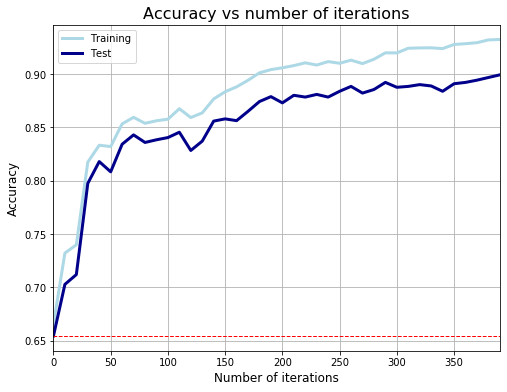

In [4]:
plot_error_rate(acc_train, acc_test)

In [6]:
print("Accuracy with 50 iterations:",adaboost(50))
print("Accuracy with 400 iterations:",adaboost(400))

Accuracy with 50 iterations: (0.8332291666666667, 0.8179166666666666)
Accuracy with 400 iterations: (0.9322916666666666, 0.8991666666666667)


The adaboost algorithm greatly improves over the first 100 iterations, and slowly improves with iterationcount above this. Another thing to notice, is that even with better test accuracy, the algorithm seems to overfit more with a high number of iterations.